In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression

In [2]:
sleep_data = pd.read_csv('Sleep_Efficiency.csv')
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

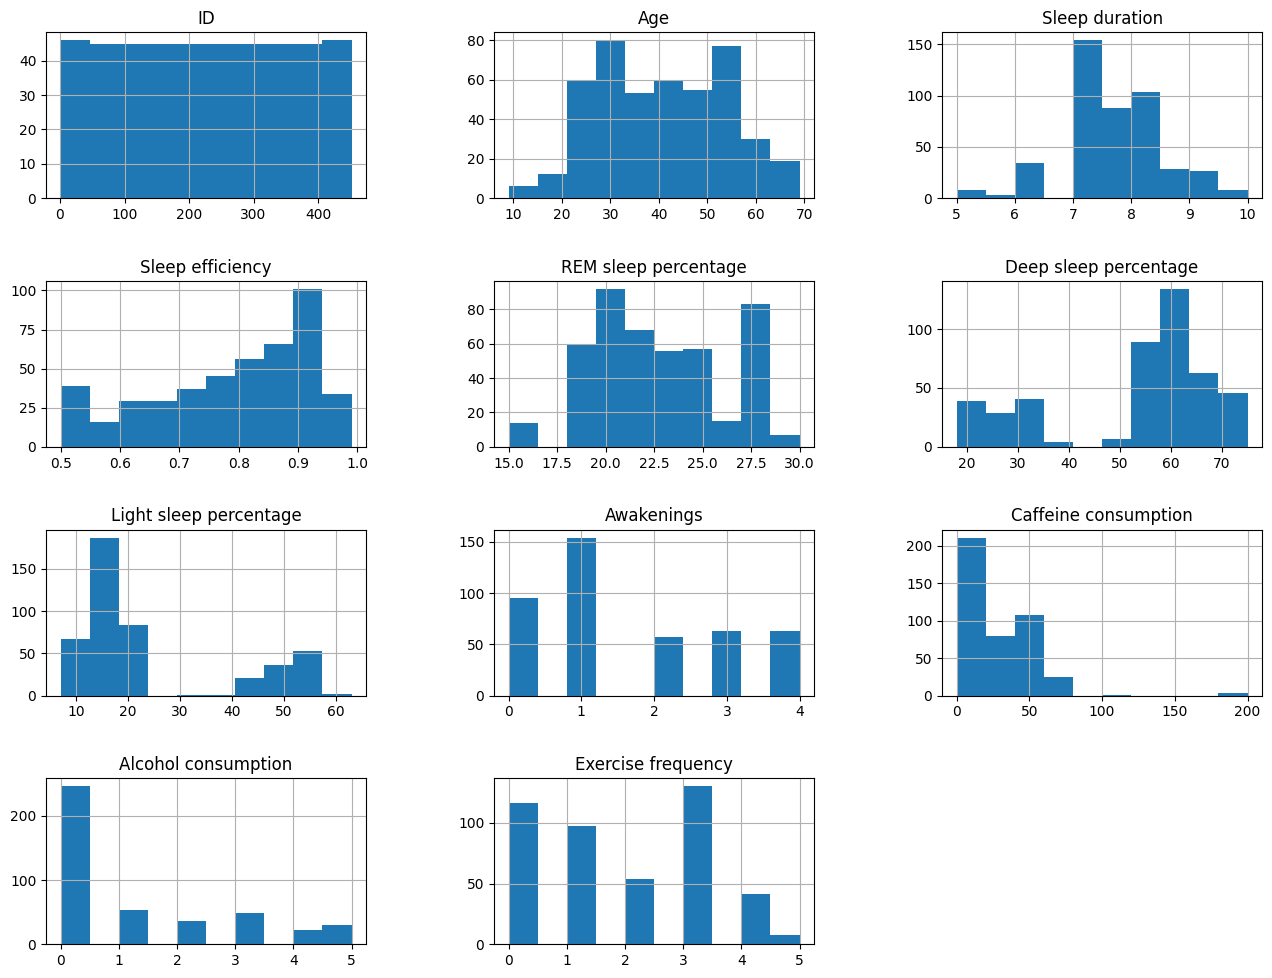

In [3]:
sleep_data.hist(layout=(4,3))
plt.subplots_adjust(left=0.1,right=2,top=2,bottom=0.1,hspace=0.5,wspace=0.4)
# sleep_data.hist()
# plt.tight_layout()
plt.show()

<Axes: xlabel='Alcohol consumption', ylabel='Sleep efficiency'>

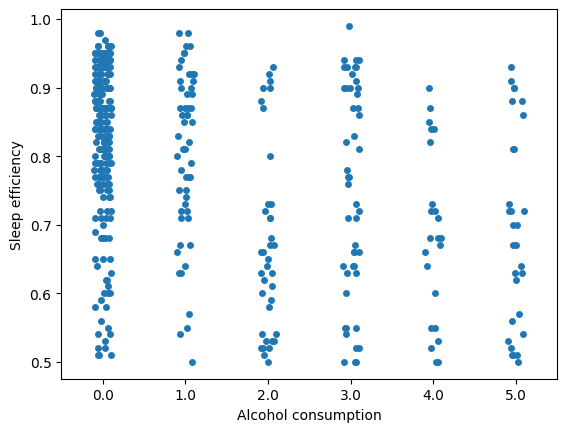

In [4]:
sns.stripplot(data=sleep_data, x='Alcohol consumption',y='Sleep efficiency')

<Axes: xlabel='Alcohol consumption', ylabel='Sleep efficiency'>

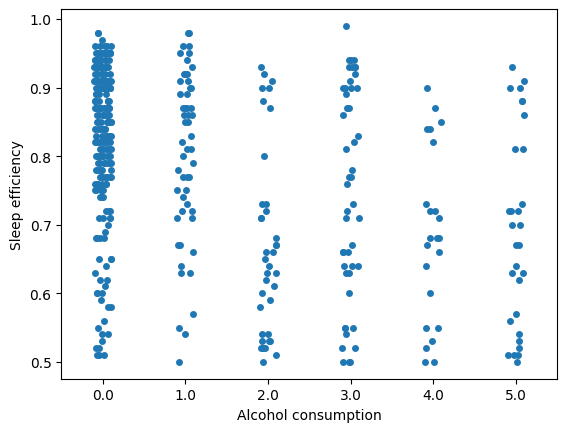

In [5]:
sns.stripplot(data=sleep_data,x='Alcohol consumption',y='Sleep efficiency')


<Axes: xlabel='Alcohol consumption', ylabel='REM sleep percentage'>

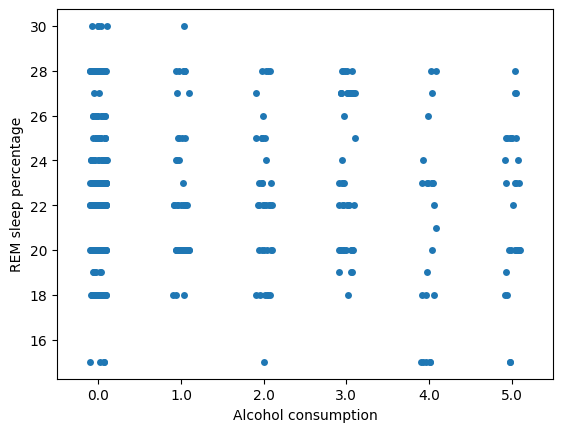

In [6]:
sns.stripplot(data=sleep_data,x='Alcohol consumption',y='REM sleep percentage')


<Axes: xlabel='Alcohol consumption', ylabel='Light sleep percentage'>

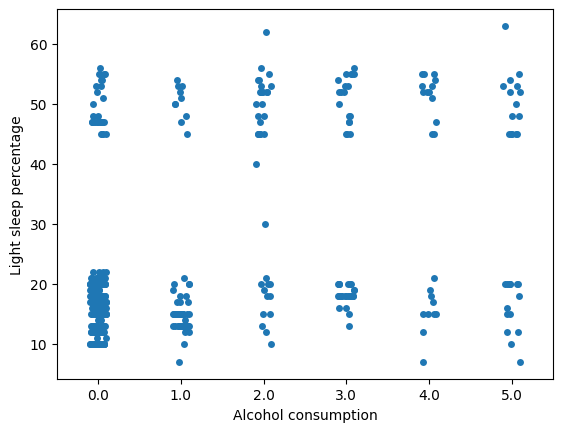

In [7]:
sns.stripplot(data=sleep_data,x='Alcohol consumption',y='Light sleep percentage')


<Axes: xlabel='Alcohol consumption', ylabel='Deep sleep percentage'>

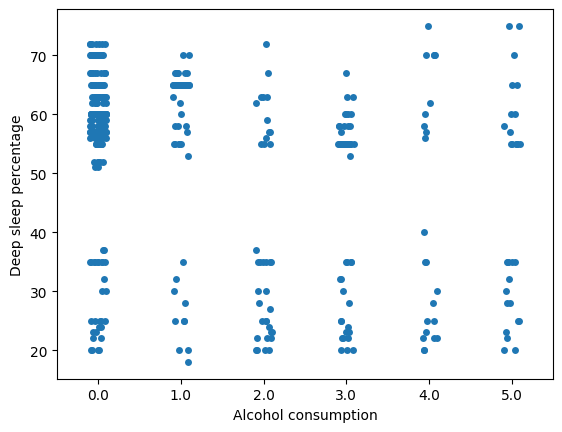

In [8]:
sns.stripplot(data=sleep_data,x='Alcohol consumption',y='Deep sleep percentage')

<Axes: xlabel='Alcohol consumption', ylabel='count'>

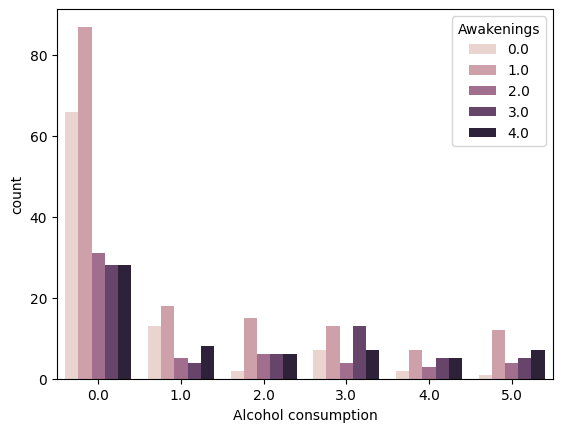

In [9]:
sns.countplot(data=sleep_data,x='Alcohol consumption',hue='Awakenings')

<Axes: xlabel='Sleep duration', ylabel='count'>

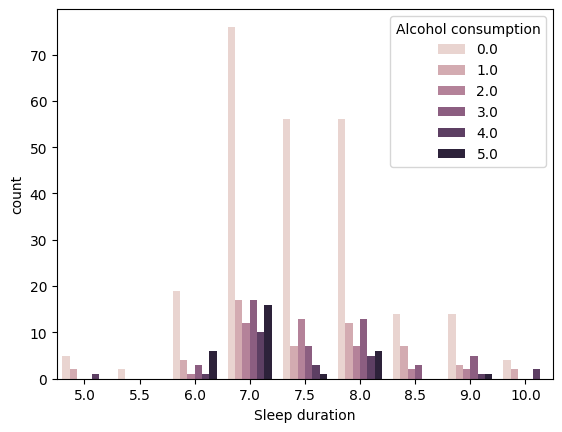

In [10]:
sns.countplot(data=sleep_data,x='Sleep duration',hue='Alcohol consumption')

<Axes: xlabel='Deep sleep percentage', ylabel='Light sleep percentage'>

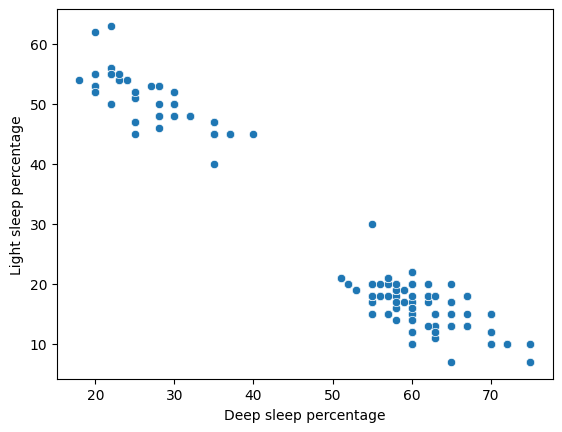

In [11]:
sns.scatterplot(data=sleep_data, x="Deep sleep percentage", y="Light sleep percentage")

In [12]:
X = sleep_data[['Light sleep percentage']].values.reshape(-1, 1)
y = sleep_data[['Deep sleep percentage']].values.reshape(-1, 1)

Text(0, 0.5, 'Deep sleep percentage')

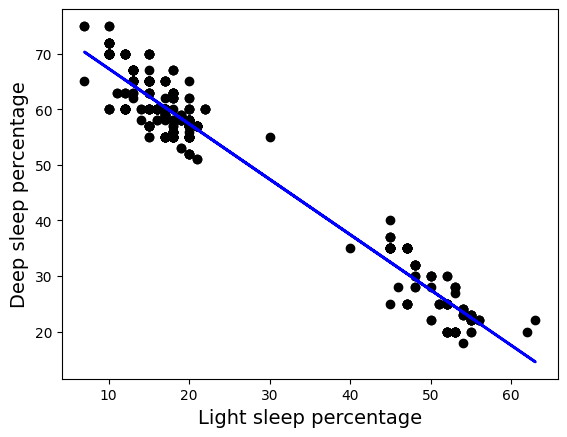

In [13]:
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Light sleep percentage', fontsize=14)
plt.ylabel('Deep sleep percentage', fontsize=14)

Text(0, 0.5, 'Deep sleep percentage')

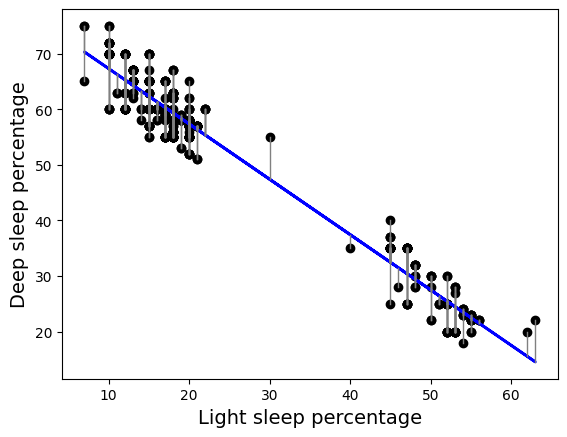

In [14]:
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], yPredicted[i]], color='grey', linewidth=1)
plt.xlabel('Light sleep percentage', fontsize=14)
plt.ylabel('Deep sleep percentage', fontsize=14)

In [15]:
intercept = linModel.intercept_
slope = linModel.coef_
# Write the least squares model as an equation
print("Predicted Deep sleep percentage = ", intercept[0], " + ", slope[0][0], "* (Light sleep percentage)")

Predicted Deep sleep percentage =  77.28620443771192  +  -0.9959794997158874 * (Light sleep percentage)


In [16]:
# Compute the sum of squared errors for the least squares model
SSEreg = sum((y - yPredicted) ** 2)[0]
SSEreg

5605.308097003087

In [17]:
# Compute the sum of squared errors for the horizontal line model
SSEyBar = sum((y - np.mean(y)) ** 2)[0]
SSEyBar

110519.84070796461

In [18]:
# Compute the proportion of variation explained by the linear regression
# using the sum of squared errors
(SSEyBar - SSEreg) / (SSEyBar)

0.9492823364465893

In [19]:
# Compute the correlation coefficient r
r = r_regression(X, np.ravel(y))[0]
r

-0.974311211290617

In [20]:
# Compute the proportion of variation explained by the linear regression
# using correlation coefficient
r**2

0.9492823364465894

In [21]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
linModel.score(X, y)

0.9492823364465894